In [1]:
import numpy as np 
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
wine = datasets.load_wine()
X = wine['data']
y = wine['target']

In [9]:
def softmax(z):
    return np.exp(z)/(np.exp(z).sum())

            
def softmax_byrow(Z):
    return (np.exp(Z)/np.exp(Z).sum(1)[:,None])

def make_I_matrix(y):
    I=np.zeros(shape=(len(y),len(np.unique(y))),dtype=int)
    for j, target in enumerate(np.unique(y)):
        I[:,j]=(y==target)
    return I

Z_test = np.array([[1, 1],
              [0,1]])
print('Softmax for Z:\n', softmax_byrow(Z_test).round(2))

y_test = np.array([0,0,1,1,2])
print('I matrix of [0,0,1,1,2]:\n', make_I_matrix(y_test), end = '\n\n')            
            
def standard_scaler(X):
    mean = X.mean(0)
    sd = X.std(0)
    return (X - mean)/sd 


Softmax for Z:
 [[0.5  0.5 ]
 [0.27 0.73]]
I matrix of [0,0,1,1,2]:
 [[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]]



In [10]:
class MulticlassLogisticRegression:
    
    def fit(self, X, y, n_iter, lr, standardize = True, has_intercept = False):
        
        ### Record Info ###
        if standardize:
            X = standard_scaler(X) 
        if not has_intercept:
            ones = np.ones(X.shape[0]).reshape(-1, 1)
            X = np.concatenate((ones, X), axis = 1)
        self.X = X
        self.N, self.D = X.shape
        self.y = y
        self.K = len(np.unique(y))
        self.n_iter = n_iter
        self.lr = lr
        
        ### Fit B ###
        B = np.random.randn(self.D*self.K).reshape((self.D, self.K))
        self.I = make_I_matrix(self.y)
        for i in range(n_iter):
            Z = np.dot(self.X, B)
            P = softmax_byrow(Z)
            gradient = np.dot(self.X.T, self.I - P)
            B += lr*gradient
        
        ### Return Values ###
        self.B = B
        self.Z = np.dot(self.X, B)
        self.P = softmax_byrow(self.Z)
        self.yhat = self.P.argmax(1)

In [11]:
multiclass_model = MulticlassLogisticRegression()
multiclass_model.fit(X, y, 10**4, 0.0001)
print('In-sample accuracy: '  + str(np.mean(multiclass_model.yhat == y)))

In-sample accuracy: 1.0


/home/cezanek/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


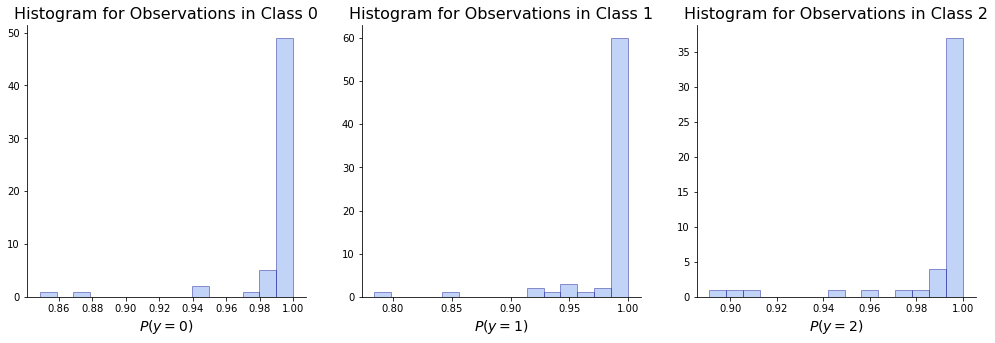

In [12]:
fig, ax = plt.subplots(1, 3, figsize = (17, 5))
for i, y in enumerate(np.unique(y)):
    sns.distplot(multiclass_model.P[multiclass_model.y == y, i],
                 hist_kws=dict(edgecolor="darkblue"), 
                 color = 'cornflowerblue',
                 bins = 15, 
                 kde = False,
                 ax = ax[i]);
    ax[i].set_xlabel(xlabel = fr'$P(y = {y})$', size = 14)
    ax[i].set_title('Histogram for Observations in Class '+ str(y), size = 16)
sns.despine()

In [18]:
#Using sklearn library
wine = datasets.load_wine()
X = wine['data']
y = wine['target']
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(multi_class='multinomial',C=10**5,max_iter=10**4)
model.fit(X,y);

In [19]:
y_hats=model.predict(X)
p_hats=model.predict_proba(X)
print(f'Training Accuracy= {model.score(X,y)}')

Training Accuracy= 1.0
